In [55]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier as ADC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LogisticRegression as LR
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import BallTree

In [2]:
airline_df = pd.read_csv('./data/airline_data.csv')
airline_df.dropna(inplace=True)
airline_df.reset_index(drop=True, inplace=True)
airline_df = pd.get_dummies(airline_df, prefix = None, prefix_sep = '_', dummy_na = False, columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class'], sparse = False, drop_first = False, dtype = None)
columns_drop = ['id', 'Unnamed: 0.1', 'Unnamed: 0']
airline_df.drop(columns_drop, axis=1, inplace = True)


In [3]:
airline_df.isnull().sum()

Age                                  0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
Gender_Female                        0
Gender_Male                          0
Customer Type_Loyal Customer         0
Customer Type_disloyal Customer      0
Type of Travel_Business travel       0
Type of Travel_Personal Travel       0
Class_Business           

In [4]:
airline_df.columns

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', 'Gender_Female', 'Gender_Male',
       'Customer Type_Loyal Customer', 'Customer Type_disloyal Customer',
       'Type of Travel_Business travel', 'Type of Travel_Personal Travel',
       'Class_Business', 'Class_Eco', 'Class_Eco Plus'],
      dtype='object')

In [38]:
airline_df.tail()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,Satisfied
129482,34,526,3,3,3,1,4,3,4,4,...,0,1,0,1,1,0,1,0,0,0
129483,23,646,4,4,4,4,4,4,4,4,...,0,1,1,0,1,0,1,0,0,1
129484,17,828,2,5,1,5,2,1,2,2,...,1,0,1,0,0,1,0,1,0,0
129485,14,1127,3,3,3,3,4,4,4,4,...,0,1,1,0,1,0,1,0,0,1
129486,42,264,2,5,2,5,4,2,2,1,...,1,0,1,0,0,1,0,1,0,0


In [6]:
dummies = pd.get_dummies(airline_df["satisfaction"])
dummies.head()

,neutral or dissatisfied,satisfied
0,1,0
1,1,0
2,0,1
3,1,0
4,0,1


In [7]:
airline_df["Satisfied"] = dummies["satisfied"]
airline_df.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,Satisfied
0,13,460,3,4,3,1,5,3,5,5,...,0,1,1,0,0,1,0,0,1,0
1,25,235,3,2,3,3,1,3,1,1,...,0,1,0,1,1,0,1,0,0,0
2,26,1142,2,2,2,2,5,5,5,5,...,1,0,1,0,1,0,1,0,0,1
3,25,562,2,5,5,5,2,2,2,2,...,1,0,1,0,1,0,1,0,0,0
4,61,214,3,3,3,3,4,5,5,3,...,0,1,1,0,1,0,1,0,0,1


In [8]:
columns_drop = ['satisfaction']
airline_df.drop(columns_drop, axis=1, inplace = True)
airline_df.head()
airline_df.dropna(inplace=True)
airline_df.reset_index(drop=True, inplace=True)

In [9]:
target = airline_df['Satisfied']

In [10]:
input_columns = airline_df.loc[:, airline_df.columns != "Satisfied"]

In [11]:
x_train, x_test, y_train, y_test = train_test_split(input_columns, target, train_size=0.8)

R:  0.8240206093985964
P:  0.8213937837598513
A:  0.8456251447988261
F:  0.8227050997782706


<AxesSubplot:>

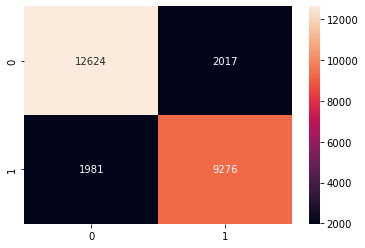

In [40]:
SGD_model = SGDClassifier(loss="perceptron", penalty="l2", max_iter=10000)

SGD_model.fit(x_train, y_train)

SGD_hat = SGD_model.predict(x_test)

recall = sklearn.metrics.recall_score(y_test, SGD_hat)
precision = sklearn.metrics.precision_score(y_test, SGD_hat)
accuracy = sklearn.metrics.accuracy_score(y_test, SGD_hat)
f_measure = sklearn.metrics.f1_score(y_test, SGD_hat)
print("R: ", recall)
print("P: ", precision)
print("A: ", accuracy)
print("F: ", f_measure)

from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, SGD_hat), annot=True, fmt='g')

# IVan 

R:  0.8761659411921471
P:  0.8917721518987342
A:  0.8999536643756275
F:  0.8839001657928933


<AxesSubplot:>

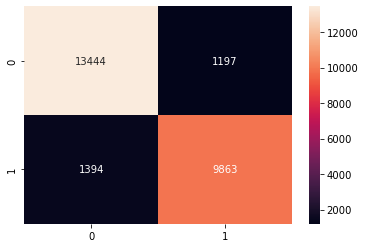

In [12]:
NB_model = CategoricalNB()

NB_model.fit(x_train, y_train)

NB_hat = NB_model.predict(x_test)

recall = sklearn.metrics.recall_score(y_test,NB_hat)
precision = sklearn.metrics.precision_score(y_test, NB_hat)
accuracy = sklearn.metrics.accuracy_score(y_test, NB_hat)
f_measure = sklearn.metrics.f1_score(y_test, NB_hat)
print("R: ", recall)
print("P: ", precision)
print("A: ", accuracy)
print("F: ", f_measure)

sns.heatmap(confusion_matrix(y_test, NB_hat), annot=True, fmt='g')

# Ivan

P:  0.6248138957816377
A:  0.6818673256622133


/projects/72aec78b-4035-4aa5-8faa-4d7af1533e7b/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


<AxesSubplot:>

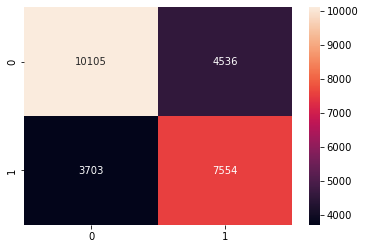

In [13]:
Neural_model = MLPClassifier(solver='lbfgs', alpha=0.1, hidden_layer_sizes=(20, 20), random_state=1)

Neural_model.fit(x_train, y_train)

Neural_hat = Neural_model.predict(x_test)

precision = sklearn.metrics.precision_score(y_test, Neural_hat)
accuracy = sklearn.metrics.accuracy_score(y_test, Neural_hat)
print("P: ", precision)
print("A: ", accuracy)

sns.heatmap(confusion_matrix(y_test, Neural_hat), annot=True, fmt='g')

P:  0.9723875046485683
A:  0.9577187427600586


<AxesSubplot:>

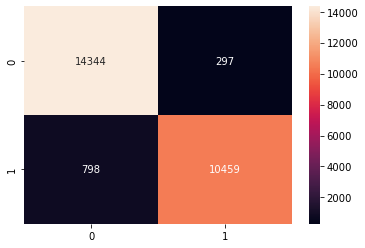

In [14]:
RF_model = RandomForestClassifier(n_estimators=10)

RF_model.fit(x_train, y_train)

RF_hat = RF_model.predict(x_test)

precision = sklearn.metrics.precision_score(y_test, RF_hat)
accuracy = sklearn.metrics.accuracy_score(y_test, RF_hat)
print("P: ", precision)
print("A: ", accuracy)

sns.heatmap(confusion_matrix(y_test, RF_hat), annot=True, fmt='g')

# Ivan 

In [33]:
tree_clf = DecisionTreeClassifier()
adc_clf = ADC()

In [23]:
tree_clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [34]:
adc_clf.fit(x_train, y_train)

AdaBoostClassifier()

In [18]:
adc_pred = adc_clf.predict(x_test)

P:  0.8213937837598513
A:  0.8456251447988261


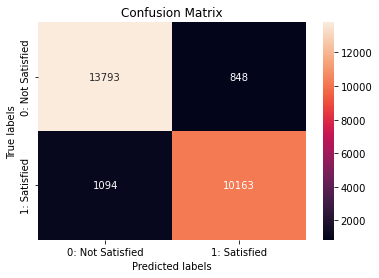

In [81]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, adc_pred), annot=True, fmt='g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['0: Not Satisfied', '1: Satisfied',]); ax.yaxis.set_ticklabels(['0: Not Satisfied', '1: Satisfied'])

print("P: ", precision)
print("A: ", accuracy)

# Sebastian 

In [20]:
total_squared_error = (np.sum((y_test - adc_pred)**2))
mean_squared_error = total_squared_error/len(y_test)
print(mean_squared_error)

0.07498648544289134


In [48]:
lr_clf = LR()

In [49]:
lr_clf.fit(x_train, y_train)

/projects/72aec78b-4035-4aa5-8faa-4d7af1533e7b/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
lr_pred=lr_clf.predict(x_test)

R:  0.8141600781735809
P:  0.7753807106598984
A:  0.8167039925863001
F:  0.7942973523421588


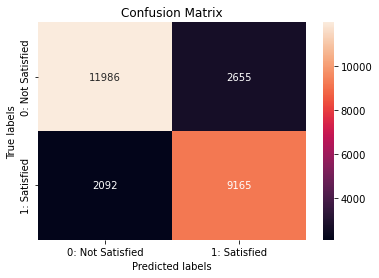

In [83]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, fmt='g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['0: Not Satisfied', '1: Satisfied',]); ax.yaxis.set_ticklabels(['0: Not Satisfied', '1: Satisfied'])

recall = sklearn.metrics.recall_score(y_test, lr_pred)
precision = sklearn.metrics.precision_score(y_test, lr_pred)
accuracy = sklearn.metrics.accuracy_score(y_test, lr_pred)
f_measure = sklearn.metrics.f1_score(y_test, lr_pred)
print("R: ", recall)
print("P: ", precision)
print("A: ", accuracy)
print("F: ", f_measure)

# Sebastian 

In [76]:
knn_clf = KNN(n_neighbors=3,weights='distance')

In [77]:
knn_clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [78]:
knn_pred = knn_clf.predict(x_test)

R:  0.6812649906724705
P:  0.7246527449683454
A:  0.7489381419414627
F:  0.7022893772893772


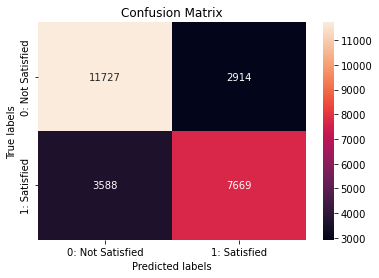

In [84]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True, fmt='g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['0: Not Satisfied', '1: Satisfied',]); ax.yaxis.set_ticklabels(['0: Not Satisfied', '1: Satisfied'])

recall = sklearn.metrics.recall_score(y_test, knn_pred)
precision = sklearn.metrics.precision_score(y_test, knn_pred)
accuracy = sklearn.metrics.accuracy_score(y_test, knn_pred)
f_measure = sklearn.metrics.f1_score(y_test, knn_pred)
print("R: ", recall)
print("P: ", precision)
print("A: ", accuracy)
print("F: ", f_measure)

# Sebastian 

In [21]:
#svc = SVC(probability=False)

In [23]:
#svc.fit(x_train, y_train)
#svc_pred = svc.pred(x_test, y_test)

<u>Models to make:</u>

- knn
- decision tree
- Random forest
- SVC \(DON'T DO THIS ONE YET\)
- Logistic regression 
- Adaboost 
- 

Scoring me
trics:

- f1 score
- Recall
- Precision 
- Accuracy

